# NAME: JASPAL RAJPUROHIT
# DOMAIN: DATA SCIENCE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('spam.csv',encoding='latin1')
data.isnull().sum()
data.duplicated().sum()

403

In [4]:
# data cleaning
data=data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [5]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
data.rename(columns={'v1':'Target','v2':'Mail'},inplace=True)
data.head(10)

,Target,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Target']=le.fit_transform(data['Target'])
data.head()

,Target,Mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#EDA
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

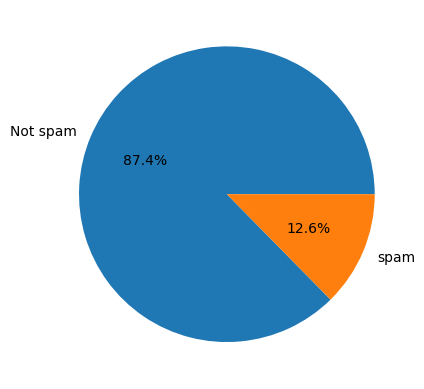

In [9]:
plt.pie(data['Target'].value_counts(),labels=['Not spam','spam'],autopct='%1.1f%%')
plt.show()
#data is not eaually distributed

In [10]:
!pip install nltk
import nltk #natural language tool kit


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
data['Word_count']=data['Mail'].apply(lambda x:len(nltk.word_tokenize(x)))

In [13]:
data['sentence_count']=data['Mail'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [14]:
data['len_text']=data['Mail'].apply(len)

In [15]:
data.head()

,Target,Mail,Word_count,sentence_count,len_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [16]:
data.describe()

,Target,Word_count,sentence_count,len_text
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,18.453279,1.947185,78.977945
std,0.332253,13.324793,1.362406,58.236293
min,0.000000,1.000000,1.000000,2.000000
25%,0.000000,9.000000,1.000000,36.000000
50%,0.000000,15.000000,1.000000,60.000000
75%,0.000000,26.000000,2.000000,117.000000
max,1.000000,220.000000,28.000000,910.000000


In [17]:
data[data['Target']==0].describe()

,Target,Word_count,sentence_count,len_text
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,17.120903,1.799601,70.459256
std,0.0,13.493725,1.278465,56.358207
min,0.0,1.000000,1.000000,2.000000
25%,0.0,8.000000,1.000000,34.000000
50%,0.0,13.000000,1.000000,52.000000
75%,0.0,22.000000,2.000000,90.000000
max,0.0,220.000000,28.000000,910.000000


In [18]:
data[data['Target']==1].describe()

,Target,Word_count,sentence_count,len_text
count,653.0,653.000000,653.000000,653.000000
mean,1.0,27.667688,2.967841,137.891271
std,0.0,7.008418,1.483201,30.137753
min,1.0,2.000000,1.000000,13.000000
25%,1.0,25.000000,2.000000,132.000000
50%,1.0,29.000000,3.000000,149.000000
75%,1.0,32.000000,4.000000,157.000000
max,1.0,46.000000,8.000000,224.000000


<Axes: ylabel='Count'>

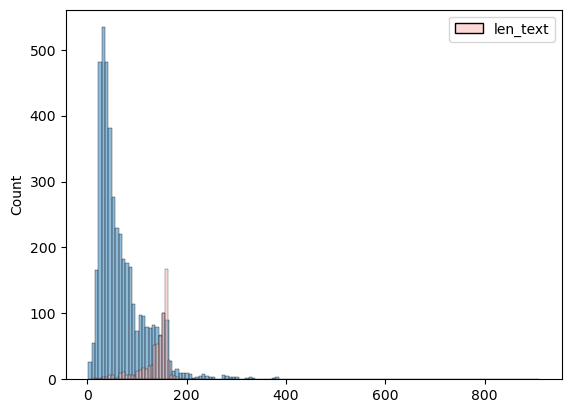

In [20]:
sns.histplot(data[data['Target']==0][['len_text']])
sns.histplot(data[data['Target']==1][['len_text']],palette='Pastel1')

<Axes: ylabel='Count'>

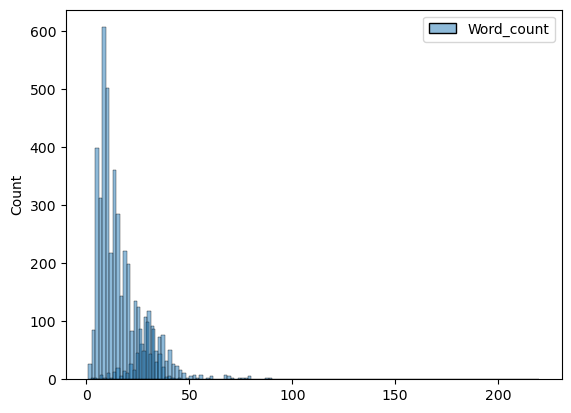

In [21]:
sns.histplot(data[data['Target']==0][['Word_count']])
sns.histplot(data[data['Target']==1][['Word_count']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8976\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

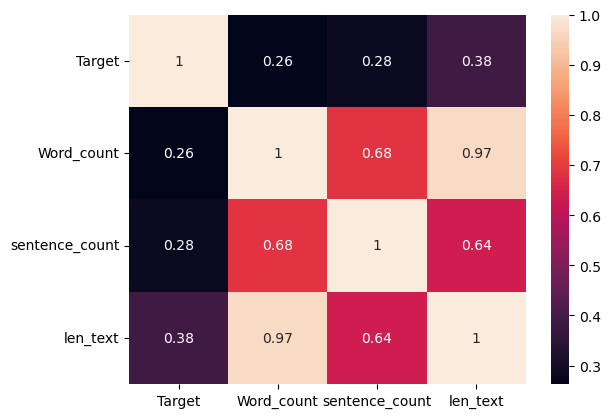

In [26]:
sns.heatmap(data.corr(),annot=True)

In [53]:
#data PReprocessing
def text_transform(text):
    text=text.lower()  
    text=nltk.word_tokenize(text)
    new_list=[]
    for i in text: 
        if i.isalnum():
            new_list.append(i) 
    
    text=new_list[:]
    new_list.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            new_list.append(i)       
        
    text=new_list[:]
    new_list.clear()
    
    for i in text:
        new_list.append(ps.stem(i))
        
    return " ".join(new_list)

 

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [55]:
data['new_text']=data['Mail'].apply(text_transform)

In [56]:
data.head()

,Target,Mail,Word_count,sentence_count,len_text,new_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [70]:
!pip install wordcloud


     -------------------------------------- 152.1/152.1 kB 2.3 MB/s eta 0:00:00


In [73]:
from wordcloud import WordCloud
w=WordCloud(width=600,height=800,min_font_size=10,background_color='white')


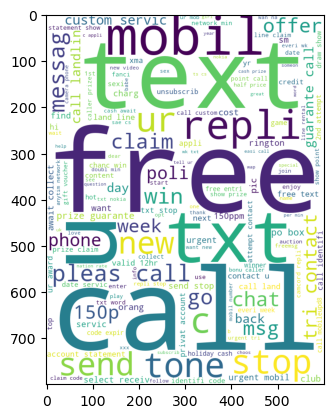

In [81]:
spam_w=w.generate(data[data['Target']==1]['new_text'].str.cat(sep=' '))
plt.imshow(spam_w)

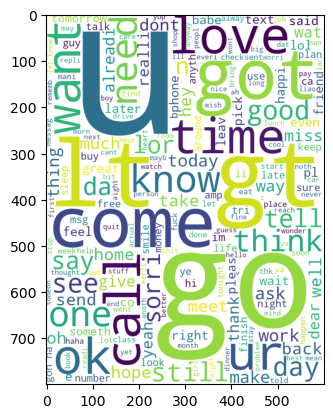

In [82]:
ham_w=w.generate(data[data['Target']==0]['new_text'].str.cat(sep=' '))
plt.imshow(ham_w)

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()


In [118]:
X=tf.fit_transform(data['new_text']).toarray()

In [119]:
Y=data['Target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=12)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gn=GaussianNB()
mn=MultinomialNB()
bn=BernoulliNB()

In [121]:
gn.fit(x_train,y_train)
y_pred1=gn.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
0.4953560371517028


In [127]:
bn.fit(x_train,y_train)
y_pred3=bn.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.968407479045777
0.9685534591194969


In [125]:
#MultinomialNB is best model among all models
#so this is the final model for this problem

mn.fit(x_train,y_train)
y_pred2=mn.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9561573178594455
1.0
